In [1]:
import numpy as np
import matplotlib.pyplot as plt

 #Generating dataset using multivariate_normal 

In [2]:
mean01=np.array([1,0.5])
cov01=np.array([[1,0.1],[0.1,0.2]])
mean02=np.array([4,5])
cov02=np.array([[1.2,0.1],[0.1,1.3]])
dist01=np.random.multivariate_normal(mean01,cov01,500)
dist02=np.random.multivariate_normal(mean02,cov02,500)

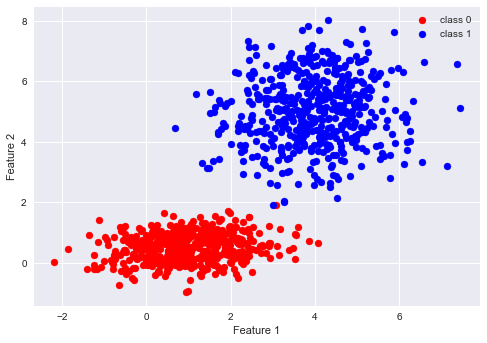

In [3]:
plt.style.use('seaborn')
plt.scatter(dist01[:,0],dist01[:,1],color='red',label="class 0")
plt.scatter(dist02[:,0],dist02[:,1],color='blue',label="class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [4]:
data=np.zeros((1000,3))
data[:500,:2]=dist01
data[500:,:2]=dist02
data[:500,-1]=0
data[500:,-1]=1


In [5]:
np.random.shuffle(data)

In [6]:
data[0:10,:]

array([[ 3.5515563 ,  0.91267009,  0.        ],
       [ 1.18568578,  1.16931671,  0.        ],
       [ 2.62733069,  2.91498264,  1.        ],
       [ 1.7200596 ,  3.42827386,  1.        ],
       [ 4.7963906 ,  5.86793258,  1.        ],
       [ 0.69320678,  0.6833807 ,  0.        ],
       [ 3.66258638,  4.34260334,  1.        ],
       [ 4.2024676 ,  3.65062829,  1.        ],
       [ 5.11281113,  7.73975173,  1.        ],
       [-0.75777965,  0.27803598,  0.        ]])

#Splitting the data into training and testing

In [7]:
split=int(0.8*data.shape[0])
x_train=data[:split,:-1]
x_test=data[split:,:-1]
y_train=data[:split,-1]
y_test=data[split:,-1]
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

#Plotting the training data and normalising it 

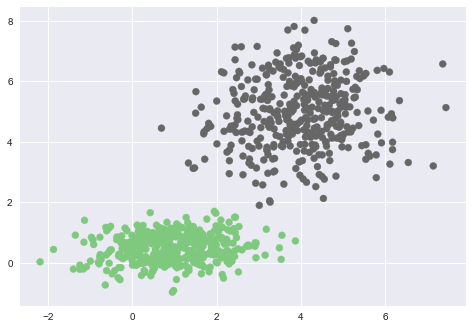

In [8]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Accent)
plt.show()

#Data Normalisation

In [9]:
u=x_train.mean(axis=0)
std=x_train.std(axis=0)
x_train=(x_train-u)/std

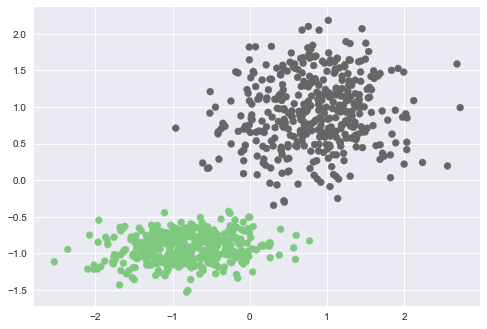

In [10]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Accent)
plt.show()

In [11]:
x_test=(x_test-u)/std

#ADDING ONE DUMMY COLUMN OF ONES IN X TRAIN FOR THETA 0

In [12]:

ones=np.ones((x_train.shape[0],1))
x_train=np.hstack((ones,x_train))
y_train=y_train.reshape((-1,1))
x_train.shape,y_train.shape



((800, 3), (800, 1))

 #MY LOGISTIC REGRESSION CODE

In [13]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
def predict(x,theta):
    return sigmoid(np.dot(x,theta))
def error(x,y,theta):
    h=predict(x,theta)
    e=-1*np.mean(y*np.log(h)+(1-y)*np.log(1-h))
    return e
def gradient(x,y,theta):
    m=x.shape[0]
    h=predict(x,theta)
    grad=-1* np.dot(x.T,(y-h))
    return grad/m 
def gradientdescent(x,y,lr=0.5,max_epoch=500):
    n=x.shape[1]
    theta=np.zeros((n,1))
    error_list=[]
    for i in range(max_epoch):
        e=error(x,y,theta)
        error_list.append(e)
        grad=gradient(x,y,theta)
        theta=theta - lr*grad
    return theta,error_list    
        
        
    
      

In [14]:
theta,error_list=gradientdescent(x_train,y_train)

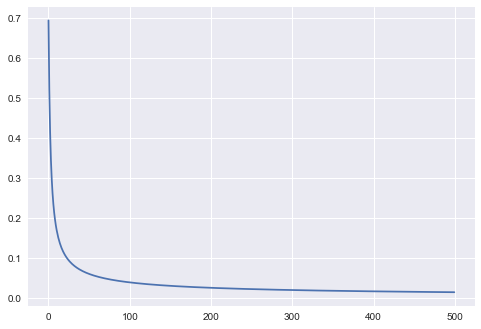

In [15]:
plt.plot(error_list)

#WE CAN SEE THE ERROR IS DECREASING 

#VISUALISING THE DECISION SURFACE

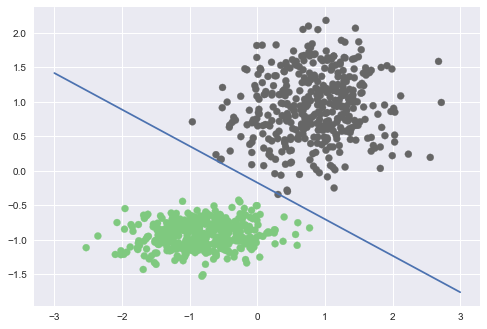

In [19]:
plt.scatter(x_train[:,1],x_train[:,2],c=y_train.reshape((-1,)),cmap=plt.cm.Accent)
x1=np.arange(-3,4)
x2=-(theta[0]+theta[1]*x1)/theta[2]
plt.plot(x1,x2)
plt.show()

#PREDICTION AND ACCURACY 

In [20]:
def predicty(x,theta):
    h=predict(x,theta)
    pred=np.zeros(h.shape)
    pred[h>=0.5]=1
    pred=pred.astype('int')
    return pred

In [22]:
ones=np.ones((x_test.shape[0],1))
x_test=np.hstack((ones,x_test))
predictions=predicty(x_test,theta)

In [31]:
predictions.shape

(200, 1)

In [33]:
y_test=y_test.reshape((-1,1))

In [36]:
def accuracy(y,preds):
    y=y.astype('int')
    correct_count=np.sum(y==preds)
    return (correct_count/y.shape[0])*100
    

In [37]:
accuracy(y_test,predictions)

99.5

#99.5% IS THE TESTING ACCURACY